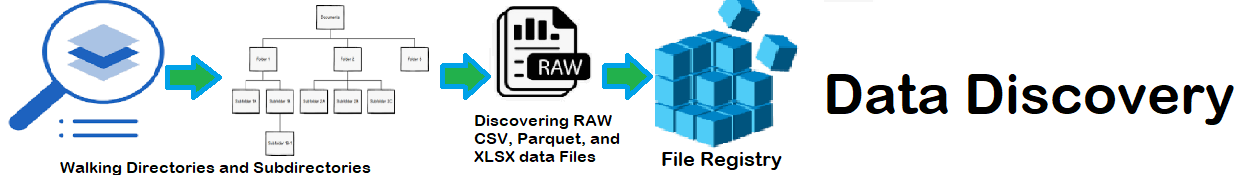

# Data File Discovery 
#### Joe Eberle, Alan Calhoun, Helmi (Al)  Seoud Code Refactored ON  : 9/20/2022  ---  Revised ON  : 10/19/2022

### Project Setup - Importing Libraries and Initializing Global Variables 

In [1]:
# Import the necessary Libraries 
import configparser
import pandas as pd 
import glob, os
from pathlib import Path
import time 
from datetime import date, datetime
from pathlib import Path

# Establish some import parameters 
solution_name = 'data_file_discovery'

# Initialize the confuration settings parser engine to get and set parameters 
config = configparser.ConfigParser()
config.read('config.ini') 

import_directory_file_number = 0 
import_file_number = 0  

## Visually Inspect that directory registry is NOT blank and that there is a table name assigned.

In [2]:
# Read the persisted dataset in to ensure its persisted   
df_import_directories = pd.read_excel('c:/working_directory/excel/import_directory_table_registry.xlsx')
df_import_directories.head(100)

FileNotFoundError: [Errno 2] No such file or directory: 'c:/working_directory/excel/import_directory_table_registry.xlsx'

In [3]:
def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Directory','Table_Name','File_Name','File_Size_Bytes','File_Created','File_Modified'))
    return df_import_files  

def add_import_file(directory,file_name,file_size_bytes,date_created,date_modified):
    global import_file_number 
    import_file_number += 1  
    df_import_files.loc[import_file_number] = [directory,file_name,file_size_bytes,date_created,date_modified]
    return import_file_number  

# Get a list of all the Subfiles to iterate through 
def register_all_files_for_import(path, file_extension):
    global total_file_count  
    extension = file_extension
    os.chdir(path)
    print(f'Discovering Path:{path}')
    file_count = 0 
    total_file_count = 0
    status = ''    
    for file in glob.glob('*.{}'.format(extension)):
        file_count += 1 
        total_file_count += 1         
        file_size_bytes = os.path.getsize(file)
        date_created =  time.ctime(os.path.getmtime(file))
        date_modified =  time.ctime(os.path.getctime(file))
        file_name = path + '\\' + file
        file_name = file_name.replace('/','\**').replace('\\','\**').replace('**','')
        file_name = file_name.replace('.','_^_')
        file_stat = f'Discovered#{str(total_file_count)} File #{str(file_count)} Filename:{file_name}'  
        status = status + file_stat
        print (file_stat)      
        file_number = add_import_file(path,file_name,file_size_bytes,date_created,date_modified)
        return status 

In [4]:
def load_files_in_directory(directory, file_extension): 
    import glob, os
    import time 
    status = f'\nDiscovering directory:{directory}'
    file_count = 0     
    os.chdir(directory)
    status = status + f'\nCurrent Directory:{os.getcwd()}'  
    for file in glob.glob(f'*.{file_extension}'): 
        file_count += 1 
        file_name = directory + "/" + file
        file_size_bytes = os.path.getsize(file)
        date_created = time.ctime(os.path.getmtime(file))
        date_modified = time.ctime(os.path.getctime(file))
        file_stat = f'\nDiscovered#{str(total_file_count)} File #{str(file_count)} File:{file}'  
        status = status + file_stat
        if file_count == 1:
            print(f'About to read file:{file_name}') 
            df_import_data = pd.read_csv(file_name)
        else: 
            print('about to read and append')            
            df_append_data = pd.read_csv(file, header=None, skiprows=2)
#             df_import_data = df_import_data(df_append_data, ignore_index=True)
        return status 
     
status = load_files_in_directory('Y:/_Kaleida_Input/Access','csv')
 

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Y:/_Kaleida_Input/Access'

In [ ]:
df_import_data = pd.read_csv(file)

In [ ]:
df_import_data = pd.read_csv('Y:/_Kaleida_Input/Access/2459631_274_20220220043457_dmhmreport_EHRSUPPORT_5592087.csv' ,nrows=1  )

In [ ]:
df_import_data.head()

In [ ]:
# import glob
# import pandas as pd
# salesdata = pd.DataFrame()
# for f in glob.glob("TransactionData\Promorelevant\*.csv"):
#     appenddata = pd.read_csv(f, header=None, sep=";")
#     salesdata = salesdata.append(appenddata,ignore_index=True)

In [ ]:
def list_files_in_directory(directory, file_extension):
    list_of_directories = import_dir_df['directory']
    dir_count = 0
    status = ''
    for dir in list_of_directories:
        dir_count += 1
        status = status + f'\nDirectory#{dir_count} to find import files:{dir}'
        if dir != 'Y:/_Kaleida_Input/Available_Slots_Past':
            if dir != 'Y:/_Kaleida_Input/Third_Next_Available':
                register_all_files_for_import(dir, file_extension) 
    return(status)                         

status = list_files_in_directory('Y:/_Kaleida_Input/Access', '.csv')
print(status)

In [ ]:
data_import_starting_directory = config.get('data_discovery', 'Data_Import_Starting_Directory_Work') 
import_file_number = 0 
df_import_files = create_import_files_dataframe() 
 
# To Unit Test the function set  developing_and_testing from False to True  
developing_and_testing = True  
if developing_and_testing:
    status = f'\nStep 1 - Initialize file registry'        
    status = status +  f'\nThe root directory to walk is : {data_import_starting_directory}'    
    status = status + f'\nThe number of files discovered for import discovered is : {import_directory_file_number}'      
    print(status)

In [ ]:
df_import_files.head()

## Step 3 - Discover and Register all CSV files to import

In [ ]:
def infer_table_name_from_path(path):
    table_name = path.replace(data_import_starting_directory,"").replace('Y:/_Kaleida_Input/','').replace('Y:_Kaleida_Input','').replace(' ','_').replace('/','').replace('\\','')
    table_name = customize_table_names(table_name)
    return table_name 

def customize_table_names(table_name):
    table_name = table_name.replace('ADPDaily_Time_Card','Time_Card').replace('Available_Slots_Past','Available_Slots')  \
    .replace('Available_Slots_Past','Available_Slots').replace('DailyAppointments','Appointments') \
    .replace('DailyAppointments','Appointments').replace('HXDX','Historical') \
    .replace('PatientInformationMain18Under','Patient_Information')  \
    .replace('QualityPrimaryCareAnnualVisitReport','Primary_Care_Annual_Visit') \
    .replace('RCM_Adujstments','RCM_Adjustments') \
    .replace('SurgicalAppointmentSummar2DaysAgo','Surgical_Appointment') \
    .replace('SurgicalAppointmentSummar2DaysAgo','Primary_Care_Annual_Visit') \
    .replace('Third_Next_Available','Third_Next_Available') \
    .replace('ADPEmployee_Census','Employee_Census') \
    .replace('Reference_-_Appointment_Types','Appointment_Type') \
    .replace('Reference_-_Budgeted_wRVU','Budgeted_RVU') \
    .replace('Reference_-_Appointment_Types','Appointment_Type') \
    .replace('Reference_-_City_Zip_State','Postal_Code') \
    .replace('Reference_-_CPT','Procedure_Code') \
    .replace('Reference_-_Employee_Roster','Employee') \
    .replace('Reference_-_Holidays','Holiday') \
    .replace('Reference_-_Patient_Inf','Patient') \
    .replace('Reference_-_Provider_Specialty','Provider_Specialty') \
    .replace('Reference_-_Referring_Doctor','Referring_Doctor') \
    .replace('Reference_-_Specialty_Code','Specialty_Code') \
    .replace('Reference_-_Surgical_Facility','Surgical_Facility') \
    .replace('Reference_-_City_Zip_State','Postal_Code') \
    .replace('Reference_-_Table_of_Contents_-_Data_Integrity','Table_of_Contents') \
    .replace('Reference_-_Table_of_Contents','Table_of_Contents') \
    .replace('Reference_-_Time_Sort','Time_Sort_Order') \
    .replace('Reference_-_Patient_Inf','Patient') \
    .replace('Reference_-_Visits_and_wRVUs_Test','Visits_and_wRVU')
    return table_name

# Get a list of all the Subfiles to iterate through 
def register_all_csv_files_for_import(path, table_name):
    global total_csv_file_count  
    extension = 'csv'
    os.chdir(path)
#     print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        print('CSV Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)


In [ ]:
df_import_files.head()


In [ ]:
df_import_files.head()

In [ ]:
# optional education - The following code will only run if educating is set to True for this solution
solution_name = 'data_discovery' 
if config.get('global_infrastructure', 'documenting') == 'True':
    import solution_documentation_data_discovery as sd    # Establish the solutions documentation as sd 
    solution_documentation = sd.get_solution_documentation()  
    print(solution_documentation) 
    solution_document_file_name = config.get('global_infrastructure', 'infrastructure_directory') + '/' + config.get('global_infrastructure', 'documentation_directory')+ '/' + solution_name + config.get('global_infrastructure', 'documentation_extension')
    sd.save_documentation(solution_document_file_name) 
    print('Solution Documention saved to file: {} '.format(solution_document_file_name))           
if config.get(solution_name, 'talking_code') == 'True': 
    import talking_code as tc  
    tc.say(solution_documentation)
    

In [ ]:
def customize_table_names(table_name):
    table_name = table_name.replace('ADPDaily_Time_Card','Time_Card').replace('Available_Slots_Past','Available_Slots')  \
    .replace('Available_Slots_Past','Available_Slots').replace('DailyAppointments','Appointments') \
    .replace('DailyAppointments','Appointments').replace('HXDX','Historical') \
    .replace('PatientInformationMain18Under','Patient_Information')  \
    .replace('QualityPrimaryCareAnnualVisitReport','Primary_Care_Annual_Visit') \
    .replace('RCM_Adujstments','RCM_Adjustments') \
    .replace('SurgicalAppointmentSummar2DaysAgo','Surgical_Appointment') \
    .replace('SurgicalAppointmentSummar2DaysAgo','Primary_Care_Annual_Visit') \
    .replace('Third_Next_Available','Third_Next_Available') \
    .replace('ADPEmployee_Census','Employee_Census') \
    .replace('Third_Next_Available','Third_Next_Available')
    return table_name

def customize_column_name_clean_up(df_to_clean):
    df_to_clean = df_to_clean.rename(columns={'Name_':'Name','Appt_Date':'Appointment_Date','Appt_Type':'Appointment_Type' \
                                ,'EbillEsuperbillNumber':'Ebill_Esuper_Bill_Number' \
                                ,'Referral_FromTodo_Selection':'Referral_From_To_Do_Selection' \
                                ,'Wellnow_LocationTodo_Selection':'Wellnow_Location_To_Do_Selection' \
                                ,'Access_Vip':'Access_VIP' \
                                ,'Vip':'VIP' \
                                ,'Todo_DateCreate_Date':'To_Do_Date_Create_Date' \
                               }, inplace = True)
    return df_to_clean


In [ ]:

# Persist the csv files in an excel import file Registry 
df_import_files.to_excel('c:/infrastructure/excel/Discovered_CSV_files_to_import.xlsx', index=False) 
df_import_files.to_excel('c:/infrastructure/temp_data/Discovered_CSV_files_to_import.xlsx', index=False) 


In [ ]:
def set_up_python_infrastructure():
    initialize_replacement_Dictionaries()    # Set up control libraries for syntactic Consistency 
    df_e_log = create_event_log_dataframe()  # Set up the Event Logging     

# Create dataframe to house Directories 
def create_directory_dataframe():
    df_import_directories = pd.DataFrame(columns = ('Root_Directory','Sub_Directory'))
    return df_import_directories  

def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name','File_Size_Bytes','File_Created','File_Modified'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_file(Root_Directory,Sub_Directory,Table_Name,File_Name,File_Size_Bytes,File_Created,File_Modified):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name,File_Size_Bytes,File_Created,File_Modified]
    return import_directory_file_Number  

# Create dataframe to house Directories 
def create_event_log_dataframe():
    df_event_log = pd.DataFrame(columns = ('Event_ID','Process_Name','Event_Name','Event_Date','Event_Time','Task_Start_Time','Task_End_Time','TASk_Duration','Comments'))
    return df_event_log

df_event_log = create_event_log_dataframe()

# Create dataframe to database schema 
def create_database_schema_dataframe():
    df_schema = pd.DataFrame(columns = ('Database_Name','Table_Name','Column_Number','Column_Name','Column_Data_Type','Column_Sample_Data','Column_Description'))
    return df_schema

# Create dataframe to house Directories 
def add_log_event(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    
# Add Log Events 
def add_log_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]
    
# Reset the Event timer start time 
def reset_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    Task_Start_Time    = time.time()  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    # Get a list of all the Subfiles to iterate through 
def list_all_csv_files(path):
    extension = 'csv'
    os.chdir(path)
    print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        tc.out('CSV File #{} filename: {}  '.format(str(csv_file_count),file))

# Get a list of all the Subfiles to iterate through 
def register_all_csv_files_for_import(path, table_name):
    global total_csv_file_count  
    extension = 'csv'
    os.chdir(path)
#     print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        tc.out('CSV Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)
        
def register_all_raw_files_for_import(path, table_name, file_extension):
    global total_csv_file_count  
    os.chdir(path)
    raw_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        raw_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        tc.out('Raw Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)

def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_File(Root_Directory,Sub_Directory,Table_Name,File_Name):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name]
    return import_directory_file_Number          
        
    
def infer_table_name_from_path(path):
    table_name = path.replace(Data_Import_Starting_Directory,"").replace('Y:/_Kaleida_Input/','').replace('Y:_Kaleida_Input','').replace(' ','_').replace('/','').replace('\\','')
    table_name = customize_table_names(table_name)
    return table_name 
    
    
def column_create_SQL (import_df):
    column_name_List = [x.title() for x in import_df.columns] # Create a List of Columns 
    column_Str =  (', '.join(column_name_List)) # Convert List into one String with commas 
    tc.out('Columns =',column_Str)  
    return column_Str            
        
def list_all_xlsx_files(path):
    extension = 'xlsx'
    os.chdir(path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        tc.out('File #{}   is {} '.format(csv_file_count,file))      
        
def convert_data_types(input_df):
    column_datatype_str = str(input_df.dtypes)
    column_datatype_str =  column_datatype_str.replace('dtype: object','').replace('object','varchar[255], ').replace('datetime64[ns]','timestamp, ').replace('float64','float, ')
    tc.out('create column SQL string: {} \n'.format(column_datatype_str))        
        
def read_and_clean_file(data_folder, filename):

    print('Import File =', filename)                 
    df_input_csv = pd.read_csv(filename, nrows=10)
    tc.out('Reading Dataframe Columns before cleanups:{}'.format(df_input_csv.columns))
    df_input_csv.columns = df_input_csv.columns.map('^'.join)
    df_input_csv.columns  = [x.strip().title().replace("^","").replace(" ","_").replace("#","Number").replace("#","Number").replace("%","Percentage") \
                             .replace('_Unnamed','').replace('Unnamed','').replace('Unnamed:','').replace('_Level','').replace("$","Dollar") \
                             .replace('_1','').replace('_2','').replace('_3','').replace('_4','').replace('_5','')  \
                             .replace('_6','').replace('_7','').replace('_8','').replace('_9','')  \
                             .replace('1','').replace('2','').replace('3','').replace('4','').replace('5','')  \
                             .replace('6','').replace('7','').replace('8','').replace('9','').replace('0','')  \
                             .replace('_0','').replace(':7','').replace(':8','').replace(':','').replace('Unnamed: ','')  \
                             for x in df_input_csv.columns]
    return df_input_csv    
 
        
    
def set_up_python_infrastructure():
    initialize_replacement_Dictionaries()    # Set up control libraries for syntactic Consistency 
    df_event_log = create_event_log_dataframe()  # Set up the Event Logging to housae the events of this process 
    create_database_schema_dataframe()       # Set up the Database Schema dataframe to house the schema

In [ ]:
def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Directory','Table_Name','File_Name','File_Size_Bytes','File_Created','File_Modified'))
    return df_import_files  


def add_import_file(Directory,Table_Name,File_Name,File_Size_Bytes,File_Created,File_Modified):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Directory,Table_Name,File_Name,File_Size_Bytes,File_Created,File_Modified]
    return import_directory_file_Number  

# Create dataframe to house Directories 
def create_event_log_dataframe():
    df_event_log = pd.DataFrame(columns = ('Event_ID','Process_Name','Event_Name','Event_Date','Event_Time','Task_Start_Time','Task_End_Time','TASk_Duration','Comments'))
    return df_event_log

df_event_log = create_event_log_dataframe()

# Create dataframe to house Directories 
def add_log_event(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    
# Add Log Events 
def add_log_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]
    
# Reset the Event timer start time 
def reset_event_timer(Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments ):
    global event_log_row  
    event_log_row += 1  
    Event_Date = date.today()
    Event_Time = time.time() 
    Task_Start_Time    = time.time()  
    df_event_log.loc[event_log_row] = [event_log_row,Process_Name,Event_Name,Event_Date,Event_Time,Task_Start_Time,Task_End_Time, Task_Duration , Comments]

    # Get a list of all the Subfiles to iterate through 
def list_all_csv_files(path):
    extension = 'csv'
    os.chdir(path)
    print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        tc.out('CSV File #{} filename: {}  '.format(str(csv_file_count),file))

# Get a list of all the Subfiles to iterate through 
def register_all_csv_files_for_import(path, table_name):
    global total_csv_file_count  
    extension = 'csv'
    os.chdir(path)
#     print('CSV Files to Import from Directory:', path)
    csv_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        csv_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        tc.out('CSV Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)
        
def register_all_raw_files_for_import(path, table_name, file_extension):
    global total_csv_file_count  
    os.chdir(path)
    raw_file_count = 0
    for file in glob.glob('*.{}'.format(extension)):
        raw_file_count += 1 
        total_csv_file_count += 1         
        File_Size = os.path.getsize(file)
        File_Last_Modified =  time.ctime(os.path.getmtime(file))
        File_Create_Date =  time.ctime(os.path.getctime(file))
        Full_Path_File_Name = path + '\\' + file
        Full_Path_File_Name = Full_Path_File_Name.replace('/','\**').replace('\\','\**').replace('**','')
        tc.out('Raw Total#{} File #{} filename: {}  '.format(str(total_csv_file_count),str(csv_file_count),Full_Path_File_Name)) 
        file_Number = add_import_file(path,path,table_name,Full_Path_File_Name,File_Size,File_Last_Modified,File_Create_Date)

def create_import_files_dataframe():
    df_import_files = pd.DataFrame(columns = ('Root_Directory','Sub_Directory','Table_Name','File_Name'))
    return df_import_files  

def add_import_directory(Root_Directory,Sub_Directory):
    global import_directory_file_Number 
    import_directory_file_Number += 1  
    df_import_directories.loc[import_directory_file_Number] = [Root_Directory,Sub_Directory]
    return import_directory_file_Number 

def add_import_File(Root_Directory,Sub_Directory,Table_Name,File_Name):
    global import_file_Number 
    import_file_Number += 1  
    df_import_files.loc[import_file_Number] = [Root_Directory,Sub_Directory,Table_Name,File_Name]
    return import_directory_file_Number          
    
df_import_directories = create_directory_dataframe() 
df_import_files = create_import_files_dataframe() 
